<a href="https://colab.research.google.com/github/MrMRaut/Drug-Stores-Sales-Analysis-and-Prediction/blob/main/1151_Drug_Stores_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    Drug Store Sales   



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual

# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance.
Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality.
With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
This Dataset consists of historical sales data for 1,115 Rossmann stores.



# **GitHub Link -**

[Github Link](https://github.com/MrMRaut/Drug-Stores-Sales-Analysis-and-Prediction/blob/main/1151%20Drug%20Stores%20Sales%20Data.ipynb)

# **Problem Statement**


**The task is to forecast the "Sales" column**

## ***1. Knowing Data***

### Import Libraries

In [15]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Load Dataset
df = pd.read_csv(r'/content/drive/MyDrive/Database/Rossmann Stores Data.csv')
df2 = pd.read_csv(r'/content/drive/MyDrive/Database/store.csv')

### Dataset First View

In [18]:
# Dataset First Look
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [19]:
df2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [20]:
# Dataset Rows & Columns count
df.shape, df2.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [21]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [23]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [24]:
df2[df2.duplicated()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


#### Missing Values/Null Values

In [25]:
# Missing Values/Null Values Count
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [26]:
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

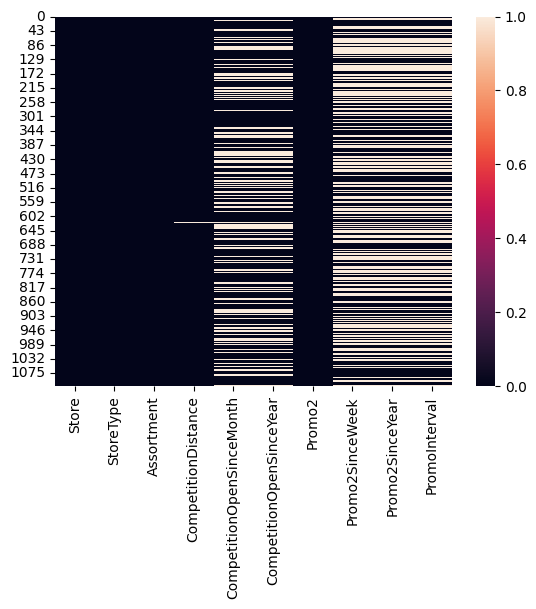

In [27]:
# Visualize Null values
sns.heatmap(df2.isnull())

### What do we know about the datasets so far?

We have 2 datasets, one of which contains the sales data for each day of all stores while the other dataset has all the information of all stores.
Second data has no duplicate values but thus have some features with null value in it.

## ***2. Understanding Variables***

In [28]:
# Dataset Columns
df.columns, df2.columns

(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday'],
       dtype='object'),
 Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
       dtype='object'))

In [29]:
# Dataset Describe
df.describe(include = "all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [30]:
df2.describe(include = "all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description

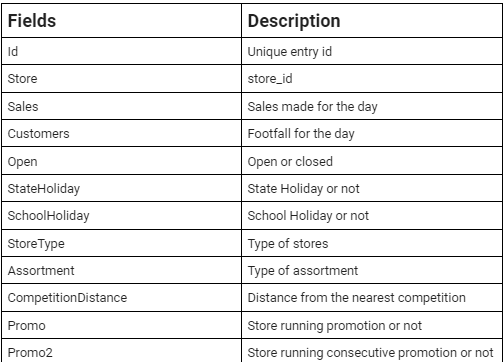

### Check Unique Values for each variable.

In [31]:
# Check Unique Values for each variable.
x = pd.DataFrame(df.columns, columns=['Name'])
x['Unique Values'] = x.Name.apply(lambda x: df[f'{x}'].nunique())
x

,Name,Unique Values
0,Store,1115
1,DayOfWeek,7
2,Date,942
3,Sales,21734
4,Customers,4086
5,Open,2
6,Promo,2
7,StateHoliday,5
8,SchoolHoliday,2


In [32]:
x = pd.DataFrame(df2.columns, columns=['Name'])
x['Unique Values'] = x.Name.apply(lambda x: df2[f'{x}'].nunique())
x

,Name,Unique Values
0,Store,1115
1,StoreType,4
2,Assortment,3
3,CompetitionDistance,654
4,CompetitionOpenSinceMonth,12
5,CompetitionOpenSinceYear,23
6,Promo2,2
7,Promo2SinceWeek,24
8,Promo2SinceYear,7
9,PromoInterval,3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [33]:
sd = pd.merge(left = df, right = df2, on='Store', how = 'left')
sd

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
df['Date'] = pd.to_datetime(df.Date)

### What all manipulations I have done and insights found?

- Combining both the data sets for EDA purpose only.
- Tranforming date column from string to datetime function.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understanding the relationships between variables***

#### Chart - 1

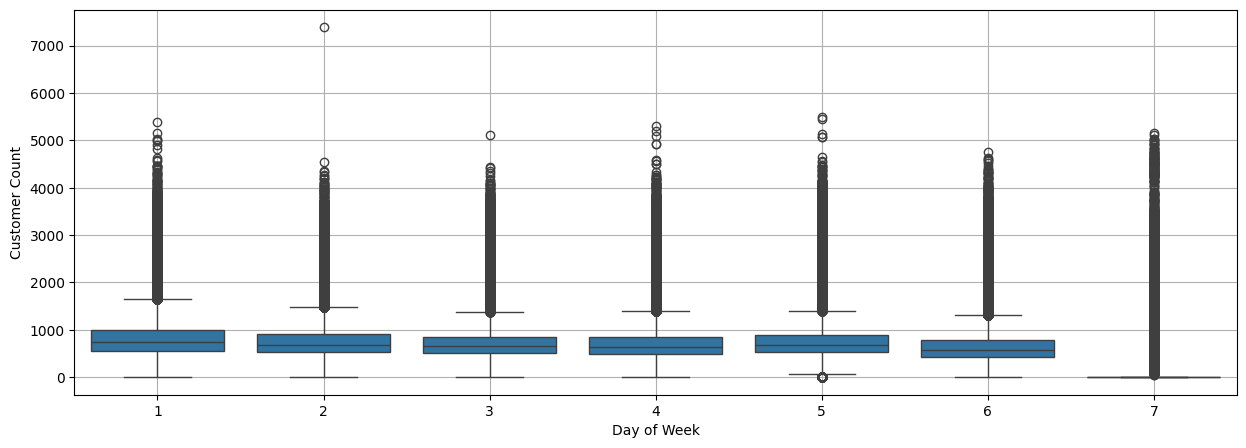

In [ ]:
temp = df.groupby('DayOfWeek')['Customers'].sum()
plt.figure(figsize=(15,5))
sns.boxplot(x = df.DayOfWeek,
           y = df.Customers)

plt.ylabel("Customer Count")
plt.xlabel("Day of Week")

plt.grid()
plt.show()

Boxplot for ploting cutomer count vs Day of week

- The above plot does contains insights for the following questions
How does the sales vary through the whole week, what is effect on sales or customer count on each day of week.

- Day 7 is the least preferred day by the customers other than that not much of variation can be noticed till day 6.

#### Chart - 2

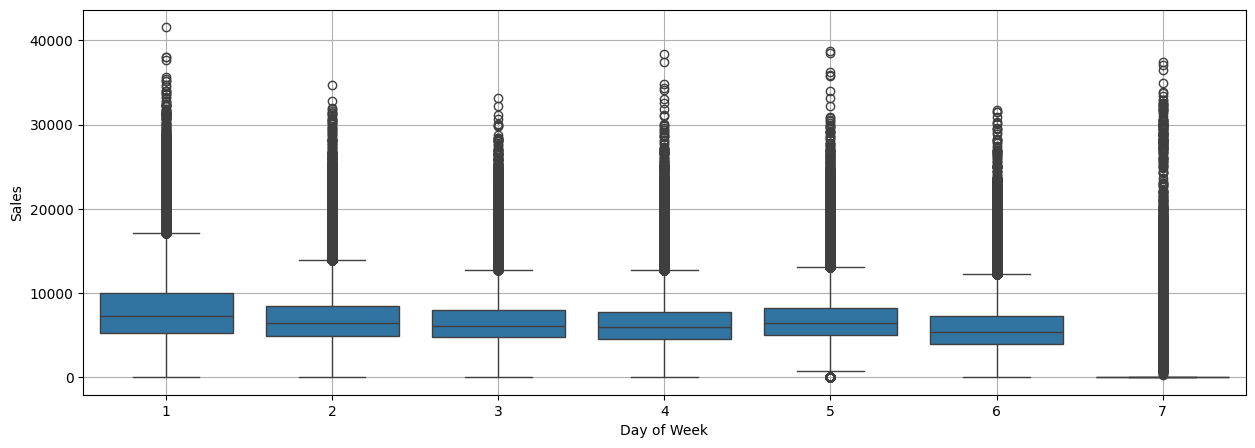

In [ ]:
# Chart - 2 visualization code
temp = df.groupby('DayOfWeek')['Sales'].sum()
plt.figure(figsize=(15,5))
sns.boxplot(x = df.DayOfWeek,
           y = df.Sales)

plt.ylabel("Sales")
plt.xlabel("Day of Week")

plt.grid()
plt.show()

Boxplot for Sales count vs Day of week.

- Fimiliar to previous chart, since customer count is directly proportional to sales.
- As the customer count fall on day 7 the effect can be seen on sales for day 7.

#### Chart - 3

In [ ]:
sd['mnth_yr'] = sd['Date'].apply(lambda x: x.strftime('%m-%y'))
sd.mnth_yr

0          07-15
1          07-15
2          07-15
3          07-15
4          07-15
           ...  
1017204    01-13
1017205    01-13
1017206    01-13
1017207    01-13
1017208    01-13
Name: mnth_yr, Length: 1017209, dtype: object

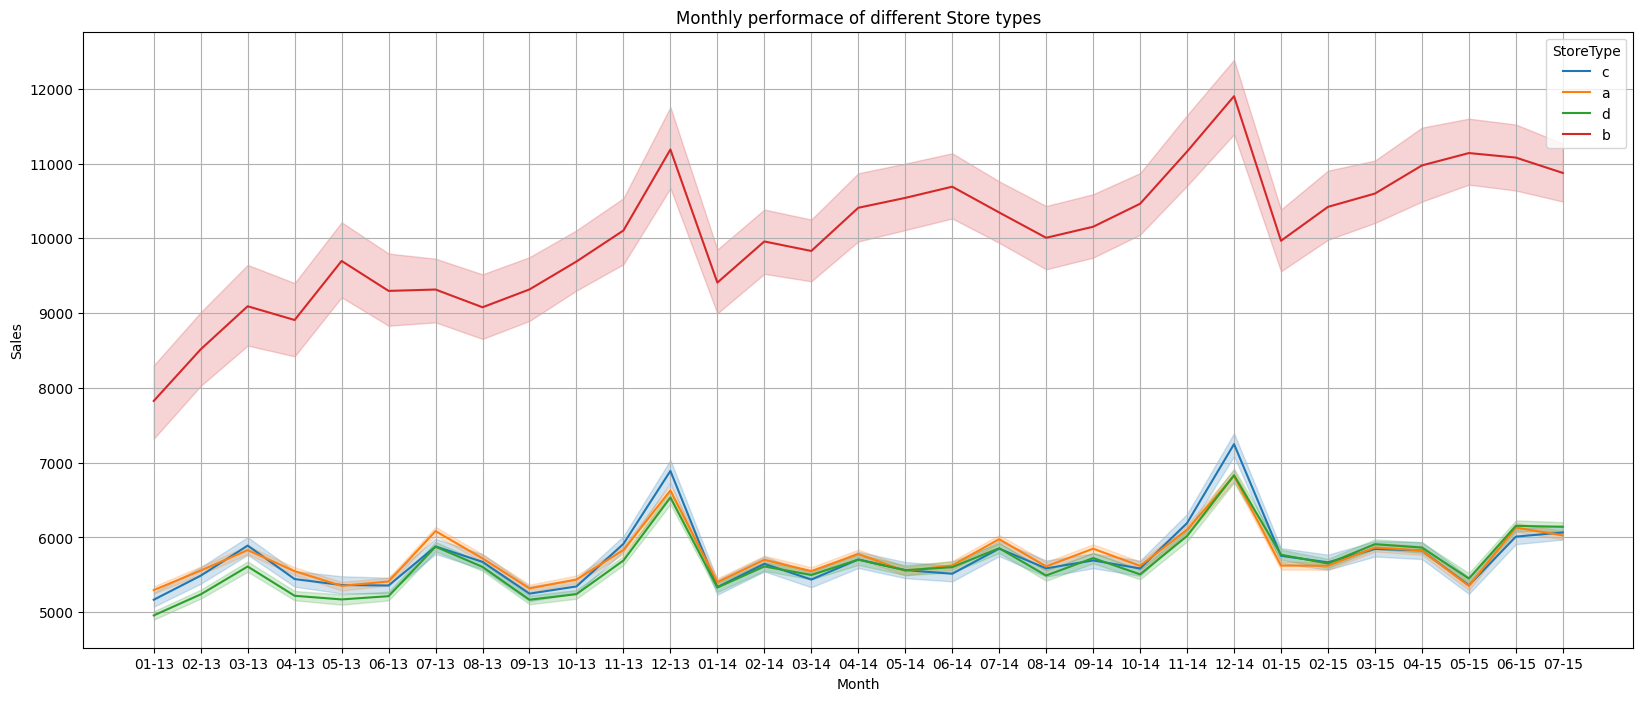

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x = sd.mnth_yr, y = sd.Sales, hue=sd.StoreType)

plt.grid()
plt.title('Monthly performace of different Types of Store')
plt.xlabel('Month')
plt.gca().invert_xaxis()

plt.show()

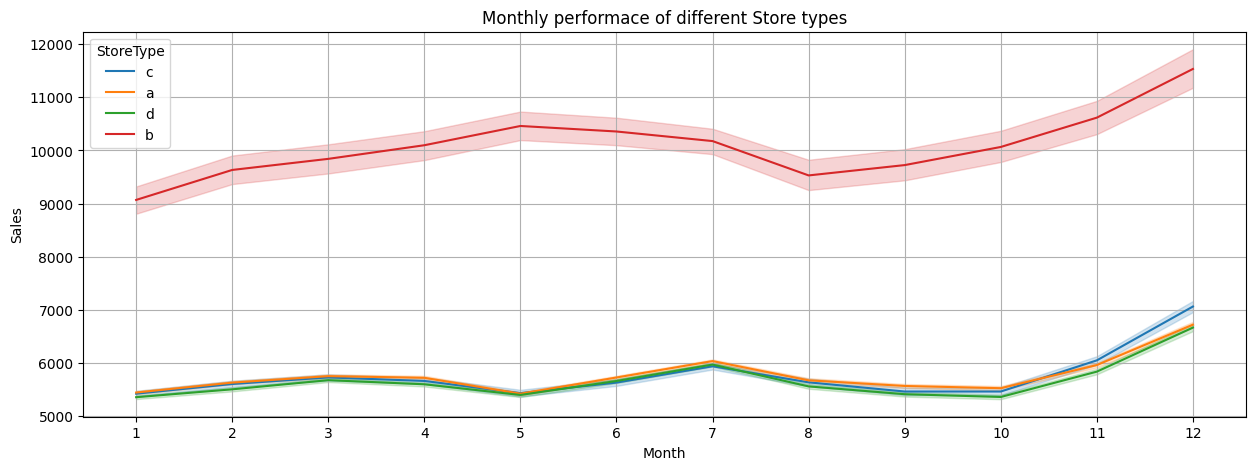

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,5))
sns.lineplot(x = sd.Date.dt.month, y = sd.Sales, hue=sd.StoreType)

plt.grid()
plt.xticks(sd.Date.dt.month.unique())
plt.title('Monthly performace of different Store types')
plt.xlabel('Month')

plt.show()

Lineplot to describe monthly sales trend.

Store type d sales are exceptionally high compared to other store types where as store type a, c, d are somewhat performing equally.

#### Chart - 4

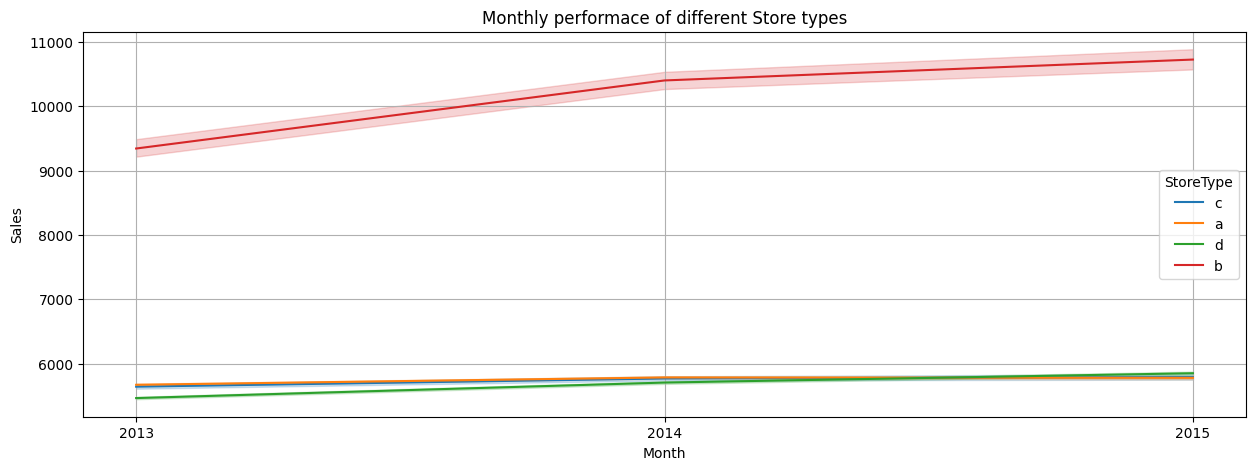

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,5))
sns.lineplot(x = sd.Date.dt.year, y = sd.Sales, hue=sd.StoreType)

plt.grid()
plt.xticks(sd.Date.dt.year.unique())
plt.title('Monthly performace of different Store types')
plt.xlabel('Month')

plt.show()

#### Chart - 5

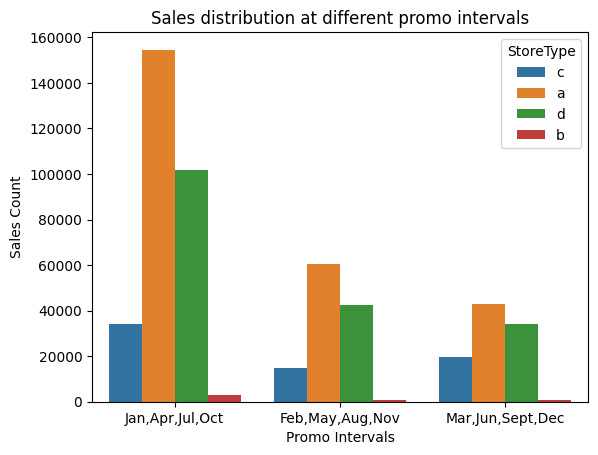

In [ ]:
# Chart - 5 visualization code

sns.countplot(x = sd.PromoInterval, hue = sd.StoreType)

plt.title('Sales distribution at different promo intervals')
plt.xlabel('Promo Intervals')
plt.ylabel('Sales Count')
plt.show()


Chart - 5 is a countplot that shows the distribution of sales across different promo intervals for each store type. The colors represent the different store types.

From the chart, we can see that store type a has the highest sales count for all promo intervals. Store type b has the second highest sales count, followed by store type c and then store type d.

We can also see that the sales count for all store types is highest during the promo intervals of 1-3 months and 4-6 months. The sales count is lowest during the promo intervals of 7-9 months and 10-12 months.



#### Chart - 6

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

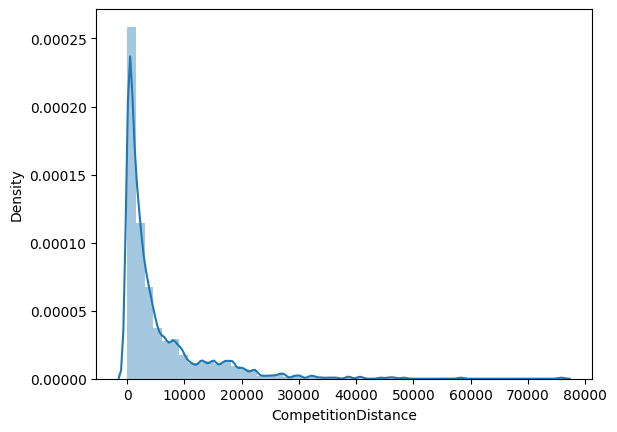

In [ ]:
# Chart - 6 visualization code

sns.distplot(sd.CompetitionDistance)

- The distribution of CompetitionDistance is skewed to the right, with a long tail on the right side. This means that there are a few stores that are located very close to competitors, while most stores are located further away.


#### Chart - 7

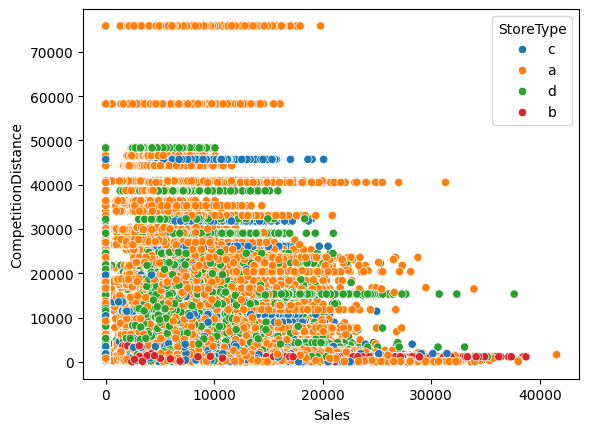

In [ ]:
# Chart - 7 visualization code

sns.scatterplot(x = sd.Sales, y = sd.CompetitionDistance, hue = sd.StoreType)

plt.show()

- As the competition distance increases the sales also increases.
- It seems like the stores that are located further away from competitors are more successful.Answer Here

#### Chart - 8

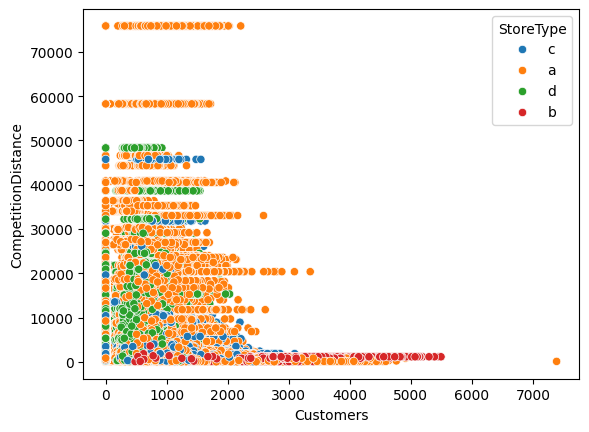

In [ ]:
# Chart - 8 visualization code
sns.scatterplot(x = sd.Customers, y = sd.CompetitionDistance, hue = sd.StoreType)

plt.show()

- Similar to previous chart s the competition distance increases the customer count also increases.
- It seems like the stores that are located further away from competitors are more successful.


#### Chart - 9

<Axes: xlabel='Sales', ylabel='Density'>

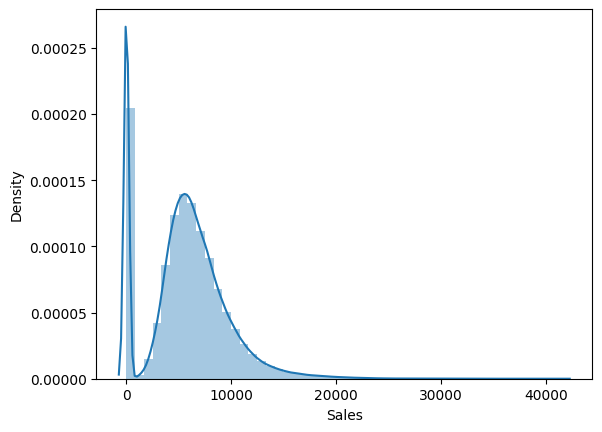

In [ ]:
# Chart - 9 visualization code
sns.distplot(sd.Sales)

- Sales data seems to be slightly skewed towards right, a square root tranformation can used to fix this.

#### Chart - 10

<Axes: xlabel='Customers', ylabel='Density'>

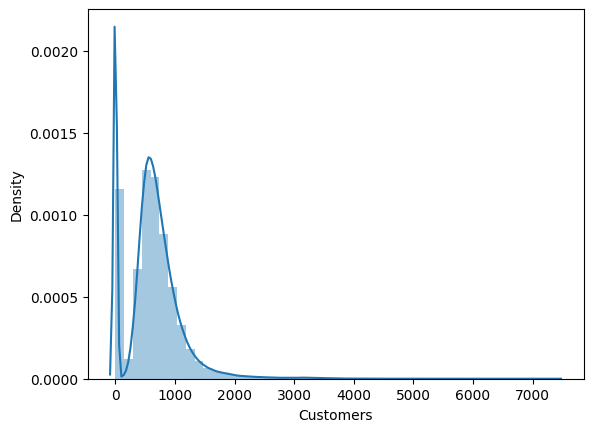

In [ ]:
# Chart - 10 visualization code

sns.distplot(sd.Customers)

plt.show()

- Just like Sales data, the customers data is also skewed towards right side. Root transfomation or log transformation must be applied to fix it.


#### Chart - 11

In [ ]:
# Chart - 11 visualization code

temp = sd[sd.CompetitionOpenSinceYear >= 1998].groupby('CompetitionOpenSinceYear')['Sales'].sum()
temp2 = sd[sd.CompetitionOpenSinceYear >= 1998].groupby('Promo2SinceYear')['Sales'].sum()

In [ ]:
temp

CompetitionOpenSinceYear
1998.0      5737921
1999.0     41892450
2000.0     60175681
2001.0     78278080
2002.0    136190565
2003.0     97218299
2004.0    103469923
2005.0    320132499
2006.0    247721540
2007.0    238392636
2008.0    271344522
2009.0    293110384
2010.0    288653207
2011.0    279859156
2012.0    424676043
2013.0    489038371
2014.0    380853414
2015.0    193471723
Name: Sales, dtype: int64

In [ ]:
temp2

Promo2SinceYear
2009.0    198623549
2010.0    222919367
2011.0    378266709
2012.0    225979458
2013.0    293153888
2014.0    354050155
2015.0     37731394
Name: Sales, dtype: int64

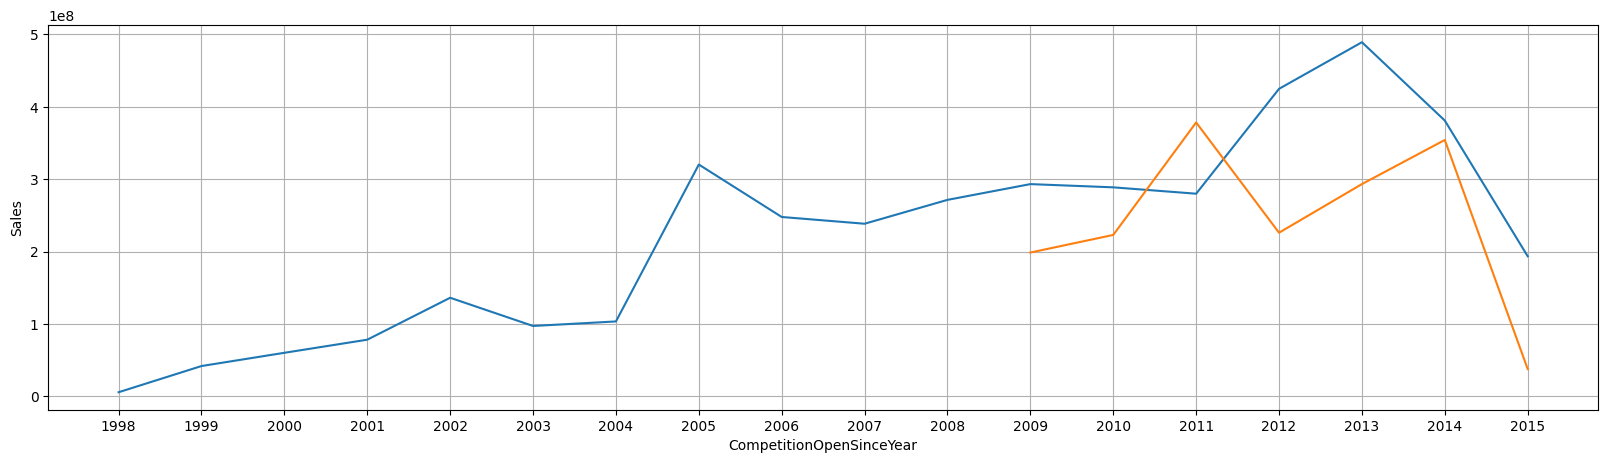

In [ ]:
plt.figure(figsize = (20,5))
sns.lineplot(temp)
sns.lineplot(temp2)

plt.xticks(temp.index)
plt.grid()
plt.show()

#### Chart - 12

<Axes: xlabel='StoreType', ylabel='Sales'>

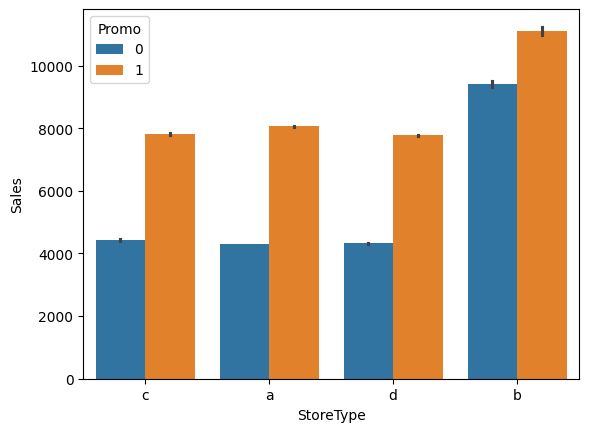

In [ ]:
# Chart - 12 visualization code
sns.barplot(x = sd.StoreType, y = sd.Sales, hue = sd.Promo)

- Stores that organize Promo events tend to have more sales regardless of what category it belongs to.

#### Chart - 14 - Correlation Heatmap

<Axes: >

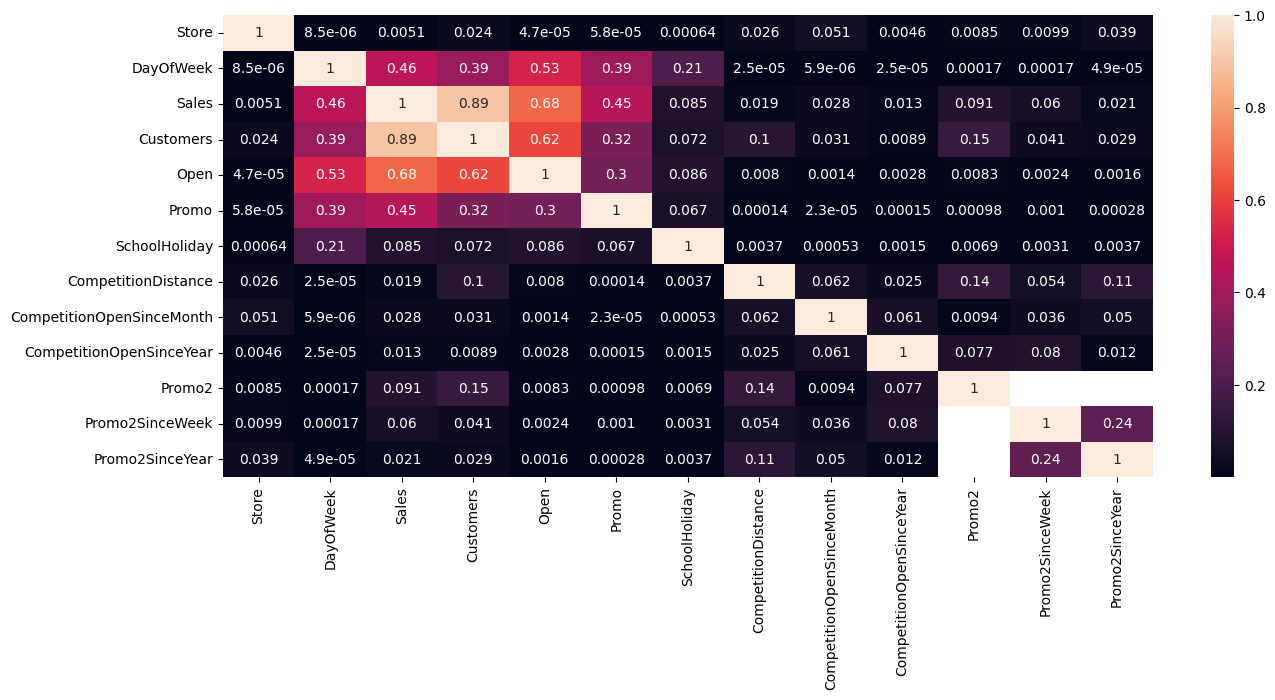

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize = (15,6))
sns.heatmap(abs(sd.corr()), annot = True)

- The features with the highest correlations are 'Customers' and 'Sales', which is expected since customers are the ones who make sales.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
pd.DataFrame(df2.isnull().sum(), columns=['Null Values'])

,Null Values
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [36]:
# Filling the null values of Competition Distance column with median value
df2.CompetitionDistance.fillna(df2.CompetitionDistance.median(), inplace=True)

In [37]:
# Filling null values of CompetitionSinceMonth & CompetitionSinceYear with mode values
df2.CompetitionOpenSinceMonth.fillna(df2.CompetitionOpenSinceMonth.mode()[0], inplace=True)
df2.CompetitionOpenSinceYear.fillna(df2.CompetitionOpenSinceYear.mode()[0], inplace=True)

- Promo2 means weather the store runs consecutive promotions or not if yes since what week and month they are running the promo  is something that discribe by other two columns.

In [38]:
# Test the above theory
df2[df2.Promo2 == 0].Promo2SinceYear.isnull().sum()

544

- So, missing values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is due to 0 in Promo2 therefore filling missing values with 0.

In [39]:
# filling the missing values with value 0
df2["Promo2SinceWeek"].fillna(value = 0, inplace=True)
df2["Promo2SinceYear"].fillna(value = 0, inplace=True)
df2["PromoInterval"].fillna(value = 0, inplace=True)

In [40]:
pd.DataFrame(df2.isnull().sum(), columns=['Null Values'])

,Null Values
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


### 2. Handling Outliers

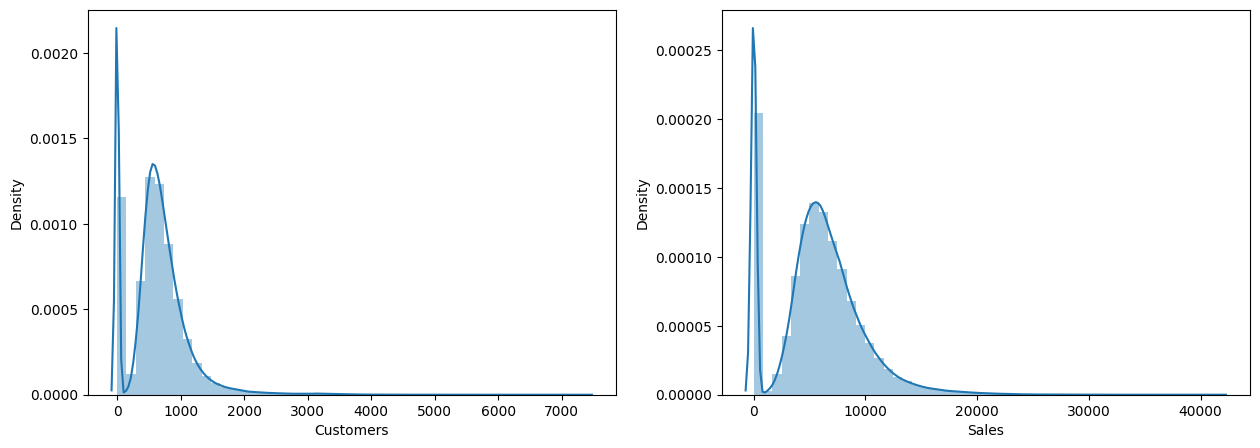

In [41]:
# Handling Outliers & Outlier treatments

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df.Customers)

plt.subplot(1,2,2)
sns.distplot(df.Sales)


plt.show()

In [42]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [43]:
def interquartile(data, lst):
  for i in lst:
    q1, q3 = data[i].quantile([0.25,0.75]).values
    lower_whisker = q1 - 1.5 *(q3 -  q1)
    upper_whisker = q3 + 1.5 *(q3 -  q1)
    data = data[(data[i] >= lower_whisker) & (data[i] <= upper_whisker)]
  return data

In [44]:
df = interquartile(df, ['Sales', 'Customers'])

In [45]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


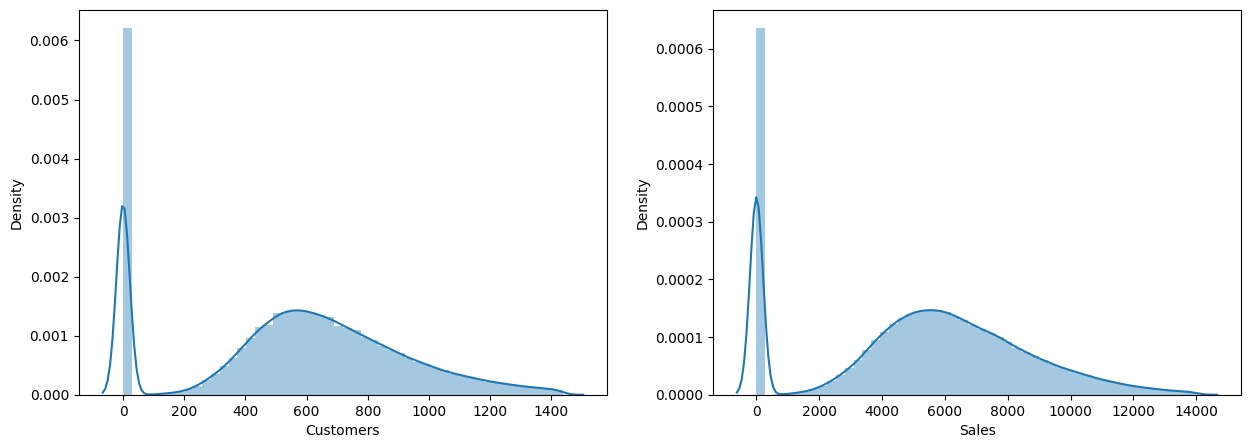

In [46]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df.Customers)

plt.subplot(1,2,2)
sns.distplot(df.Sales)


plt.show()

- Interquartile Range method to treat outliers

In [47]:
# Combining both data sets

maindf = pd.merge(right = df, left = df2, on = 'Store', how = 'inner')

In [48]:
maindf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967869,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
967870,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
967871,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
967872,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


### 3. Categorical Encoding

In [49]:
maindf

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967869,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
967870,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
967871,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
967872,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [50]:
# Encode your categorical columns
lst = [i for i in maindf.columns if (len(maindf[f'{i}'].unique()) < 100) ]
f'Total Categorical Columns = {len(lst)} '

'Total Categorical Columns = 13 '

In [51]:
maindf.PromoInterval = maindf.PromoInterval.apply(lambda x: str(x))

In [52]:
maindf.StateHoliday = maindf.StateHoliday.apply(lambda x: str(x))

In [53]:
lst

['StoreType',
 'Assortment',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [54]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'first', sparse = False)

encoded_columns = pd.DataFrame(encoder.fit_transform(maindf[['StoreType',
                                                             'Assortment',
                                                             'CompetitionOpenSinceYear',
                                                             'Promo2SinceYear',
                                                             'PromoInterval',
                                                             'StateHoliday',
                                                             'DayOfWeek']]), columns = encoder.get_feature_names_out())

maindf.drop([ 'StoreType',
              'Assortment',
              'CompetitionOpenSinceYear',
              'Promo2SinceYear',
              'PromoInterval',
              'StateHoliday',
              'DayOfWeek'], axis = 1, inplace = True) #Dropping all categorical columns that are encoded



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [55]:
# dropping date and store features due to its irrelevance, also dropping the Customers columns since it is highly correlated to Sales Feature (Reger Correlation chart)

maindf.drop(['Date', 'Customers', 'Store'], axis = 1, inplace = True)

In [56]:
maindf

,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek,Sales,Open,Promo,SchoolHoliday
0,1270.0,9.0,0,0.0,5263,1,1,1
1,1270.0,9.0,0,0.0,5020,1,1,1
2,1270.0,9.0,0,0.0,4782,1,1,1
3,1270.0,9.0,0,0.0,5011,1,1,1
4,1270.0,9.0,0,0.0,6102,1,1,1
...,...,...,...,...,...,...,...,...
967869,5350.0,9.0,1,22.0,4771,1,0,1
967870,5350.0,9.0,1,22.0,4540,1,0,1
967871,5350.0,9.0,1,22.0,4297,1,0,1
967872,5350.0,9.0,1,22.0,3697,1,0,1


In [57]:
masterdf = pd.concat([maindf, encoded_columns], axis = 1)  #Combining encoded feature to our main dataset

#### 2. Feature Selection

In [58]:
# Select your features wisely to avoid overfitting
dict(zip(list(masterdf.columns), [masterdf[f'{i}'].nunique() for i in masterdf.columns]))

{'CompetitionDistance': 654,
 'CompetitionOpenSinceMonth': 12,
 'Promo2': 2,
 'Promo2SinceWeek': 25,
 'Sales': 13188,
 'Open': 2,
 'Promo': 2,
 'SchoolHoliday': 2,
 'StoreType_b': 2,
 'StoreType_c': 2,
 'StoreType_d': 2,
 'Assortment_b': 2,
 'Assortment_c': 2,
 'CompetitionOpenSinceYear_1961.0': 2,
 'CompetitionOpenSinceYear_1990.0': 2,
 'CompetitionOpenSinceYear_1994.0': 2,
 'CompetitionOpenSinceYear_1995.0': 2,
 'CompetitionOpenSinceYear_1998.0': 2,
 'CompetitionOpenSinceYear_1999.0': 2,
 'CompetitionOpenSinceYear_2000.0': 2,
 'CompetitionOpenSinceYear_2001.0': 2,
 'CompetitionOpenSinceYear_2002.0': 2,
 'CompetitionOpenSinceYear_2003.0': 2,
 'CompetitionOpenSinceYear_2004.0': 2,
 'CompetitionOpenSinceYear_2005.0': 2,
 'CompetitionOpenSinceYear_2006.0': 2,
 'CompetitionOpenSinceYear_2007.0': 2,
 'CompetitionOpenSinceYear_2008.0': 2,
 'CompetitionOpenSinceYear_2009.0': 2,
 'CompetitionOpenSinceYear_2010.0': 2,
 'CompetitionOpenSinceYear_2011.0': 2,
 'CompetitionOpenSinceYear_2012.0': 2

### 5. Data Transformation

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

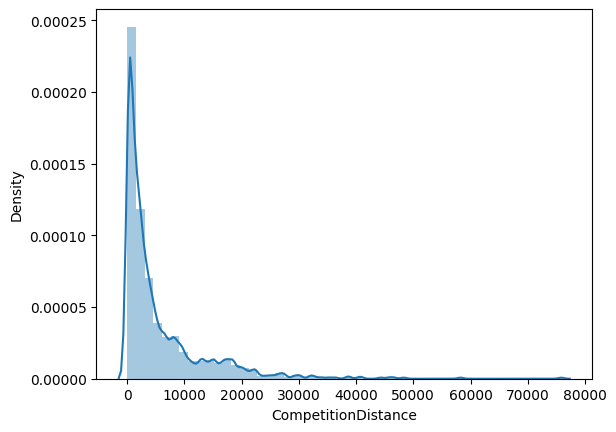

In [59]:
sns.distplot(masterdf.CompetitionDistance)

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

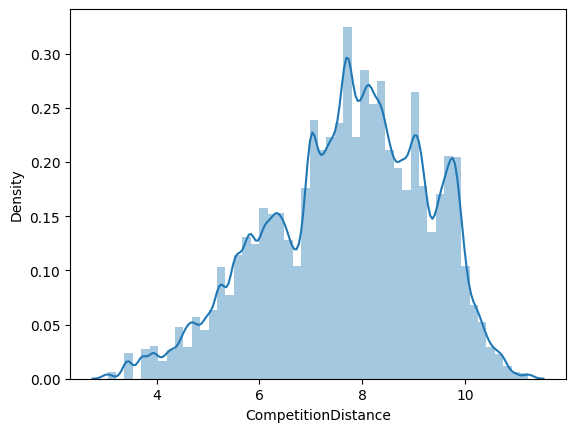

In [60]:
sns.distplot(np.log1p(masterdf.CompetitionDistance))

In [61]:
# Taking Log transformation to treat the skweness of the dat

masterdf.CompetitionDistance = np.log1p(masterdf.CompetitionDistance)

In [62]:
masterdf.Promo2SinceWeek.unique()

array([ 0., 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

### 6. Data Scaling

In [63]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()


### 7. Dimesionality Reduction

In [64]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967874 entries, 0 to 967873
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CompetitionDistance              967874 non-null  float64
 1   CompetitionOpenSinceMonth        967874 non-null  float64
 2   Promo2                           967874 non-null  int64  
 3   Promo2SinceWeek                  967874 non-null  float64
 4   Sales                            967874 non-null  int64  
 5   Open                             967874 non-null  int64  
 6   Promo                            967874 non-null  int64  
 7   SchoolHoliday                    967874 non-null  int64  
 8   StoreType_b                      967874 non-null  float64
 9   StoreType_c                      967874 non-null  float64
 10  StoreType_d                      967874 non-null  float64
 11  Assortment_b                     967874 non-null  float64
 12  As

In [65]:
# prompt: use PCA on masterdf

from sklearn.decomposition import PCA
# Perform PCA on the scaled data
pca = PCA(n_components=50)
pca.fit(masterdf.drop('Sales', axis = 1))
pca_components = pca.transform(masterdf.drop('Sales', axis = 1))
pca_components


array([[-1.18452615e+01, -1.21266531e+00,  7.14400335e-01, ...,
        -4.19269325e-03, -5.27890197e-03, -1.92504313e-03],
       [-1.18452685e+01, -1.21275287e+00,  7.14903367e-01, ...,
        -4.17496214e-03, -5.25400962e-03, -2.23943778e-03],
       [-1.18452837e+01, -1.21267944e+00,  7.14748279e-01, ...,
        -4.20180134e-03, -5.31724140e-03, -5.36271070e-04],
       ...,
       [ 1.01676218e+01, -1.19260833e+00, -1.08323195e+00, ...,
        -1.32341293e-02,  2.80625468e-03, -7.43178259e-03],
       [ 1.01676066e+01, -1.19253490e+00, -1.08338704e+00, ...,
        -1.32609685e-02,  2.74302291e-03, -5.72861587e-03],
       [ 1.01677562e+01, -1.19196829e+00, -1.07830948e+00, ...,
        -1.33455261e-02,  2.37703982e-03, -1.10261678e-03]])

In [66]:
pca_df = pd.DataFrame(pca_components)

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

x = masterdf.drop('Sales', axis = 1)          # Original Dataset
#x = pca_df                                   # PCA reduced dimension dataset
y = masterdf.Sales

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

## ***6. ML Model Implementation***

### ML Model - 1

In [65]:
# ML Model - 1 Implementation
# Import the Linear Regression model from sklearn library
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model object
lr = LinearRegression()

# Fit the Algorithm
lr.fit(xtrain, ytrain)

# Predict on the Linear Regression model
lr_ypred = lr.predict(xtest)
lr_ytrain_pred = lr.predict(xtrain)


In [66]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
print(f'''
For Test Data:
MAE : {mean_absolute_error(ytest, lr_ypred)}
MSE : {mean_squared_error(ytest, lr_ypred)}
R2 Score :{r2_score(ytest, lr_ypred)}

From Train Data:
MAE : {mean_absolute_error(ytrain, lr_ytrain_pred)}
MSE : {mean_squared_error(ytrain, lr_ytrain_pred)}
R2 Score : {r2_score(ytrain, lr_ytrain_pred)}

''')



For Test Data:
MAE : 1399.9018151965454
MSE : 3428594.394499915
R2 Score :0.6811320732147066

From Train Data:
MAE : 1394.0894462033045
MSE : 3402875.67855837
R2 Score : 0.682238623695673




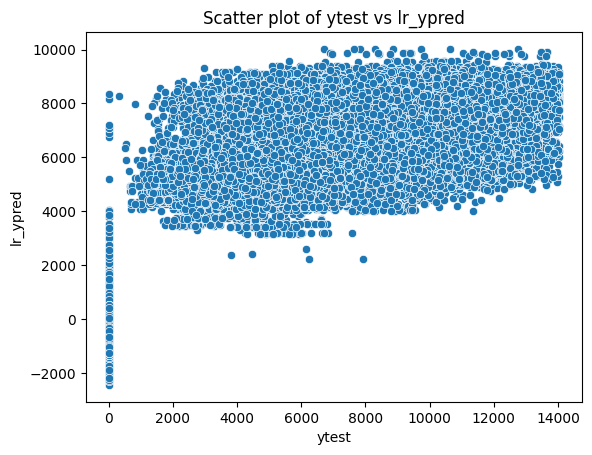

In [67]:

sns.scatterplot(x = ytest, y = lr_ypred)
plt.xlabel('ytest')
plt.ylabel('lr_ypred')
plt.title('Scatter plot of ytest vs lr_ypred')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

In [69]:
# Ridge Regression
from sklearn.linear_model import RidgeCV

rr = RidgeCV(cv = 5)

# Fit the Algorithm
rr.fit(xtrain, ytrain)

RidgeCV(cv=5)

In [70]:
# Predict on the model
rr_ypred = rr.predict(xtest)
rr_ypred_train = rr.predict(xtrain)

In [71]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
print(f'''
For Test Data:
MAE : {mean_absolute_error(ytest, rr_ypred)}
MSE : {mean_squared_error(ytest, rr_ypred)}
R2 Score :{r2_score(ytest, rr_ypred)}

From Train Data:
MAE : {mean_absolute_error(ytrain, rr_ypred_train)}
MSE : {mean_squared_error(ytrain, rr_ypred_train)}
R2 Score : {r2_score(ytrain, rr_ypred_train)}

''')


For Test Data:
MAE : 1399.8159883493279
MSE : 3428319.9650479145
R2 Score :0.6811575958459483

From Train Data:
MAE : 1394.017931503032
MSE : 3402752.5209966777
R2 Score : 0.6822501241793821




In [72]:
# Lasso Regulaiztion
from sklearn.linear_model import LassoCV

# Create a Lasso Regression object
llr = LassoCV(cv = 5)

# fit the algorithm
llr.fit(xtrain, ytrain)

# Predict on the model
llr_ypred = llr.predict(xtest)
llr_pred_train = llr.predict(xtrain)


In [73]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
print(f'''
For Test Data:
MAE : {mean_absolute_error(ytest, llr_ypred)}
MSE : {mean_squared_error(ytest, llr_ypred)}
R2 Score :{r2_score(ytest, llr_ypred)}

From Train Data:
MAE : {mean_absolute_error(ytrain, llr_pred_train)}
MSE : {mean_squared_error(ytrain, llr_pred_train)}
R2 Score : {r2_score(ytrain, llr_pred_train)}

''')


For Test Data:
MAE : 1399.0259698900095
MSE : 3429687.364850069
R2 Score :0.6810304242152942

From Train Data:
MAE : 1393.2661104568097
MSE : 3404424.257225915
R2 Score : 0.6820940170349551




### ML Model - 2

In [90]:
# # ML Model - 3 Implementation
# from sklearn.svm import SVR
# svr = SVR()

# # Fit the Algorithm
# svr.fit(xtrain, ytrain)

# # Predict on the model
# ypred = svr.predict(xtest)
# ypred_train = svr.predict(xtrain)

# from sklearn.neighbors import KNeighborsRegressor
# kr = KNeighborsRegressor()

# # Fit the Algorithm
# kr.fit(xtrain, ytrain)

# # Predict on the model
# kr_ypred = kr.predict(xtest)
# kr_ypred_train = kr.predict(xtrain)

In [91]:
# print(f'''
# For Test Data:
# MAE : {mean_absolute_error(ytest, kr_ypred)}
# MSE : {mean_squared_error(ytest, kr_ypred)}
# R2 Score :{r2_score(ytest, kr_ypred)}

# From Train Data:
# MAE : {mean_absolute_error(ytrain, kr_ypred_train)}
# MSE : {mean_squared_error(ytrain, kr_ypred_train)}
# R2 Score : {r2_score(ytrain, kr_ypred_train)}

# ''')

### ML Model - 3

In [74]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

# Fit the Algorithm
dt.fit(xtrain, ytrain)

# Predict on the model
dt_ypred = dt.predict(xtest)
dt_ypred_train = dt.predict(xtrain)

In [75]:
print(f'''
For Test Data:
MAE : {mean_absolute_error(ytest, dt_ypred)}
MSE : {mean_squared_error(ytest, dt_ypred)}
R2 Score :{r2_score(ytest, dt_ypred)}

From Train Data:
MAE : {mean_absolute_error(ytrain, dt_ypred_train)}
MSE : {mean_squared_error(ytrain, dt_ypred_train)}
R2 Score : {r2_score(ytrain, dt_ypred_train)}

''')


For Test Data:
MAE : 597.3143524748233
MSE : 870477.6634129258
R2 Score :0.919043381657902

From Train Data:
MAE : 572.9975263454968
MSE : 795439.5180068855
R2 Score : 0.9257216601824841




## ***7.*** ***Future Work***


### 1. Saving the best performing ml model in a pickle file format for deployment process.


In [78]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.7 MB/s 

In [80]:
from pycaret.regression import setup, compare_models, evaluate_model, predict_model, save_model


In [81]:
s = setup(masterdf, target = 'Sales')

,Description,Value
0,Session id,8921
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(967874, 54)"
4,Transformed data shape,"(967874, 54)"
5,Transformed train set shape,"(677511, 54)"
6,Transformed test set shape,"(290363, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


In [82]:
best_model = s.compare_models(exclude = ['svm', 'knn', 'lda', 'dummy', 'qda'], cross_validation = False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,597.2134,870508.5649,933.0105,0.9187,0.1558,0.1181,7.3600
rf,Random Forest Regressor,597.3710,870462.1067,932.9856,0.9187,0.1558,0.1182,370.8700
et,Extra Trees Regressor,597.2113,870346.1348,932.9234,0.9187,0.1558,0.1181,505.2700
xgboost,Extreme Gradient Boosting,851.1426,1405931.5522,1185.7198,0.8687,2.2745,0.1675,12.2600
lightgbm,Light Gradient Boosting Machine,1021.1201,2015134.6268,1419.5544,0.8118,2.0033,0.2159,7.4900
gbr,Gradient Boosting Regressor,1286.6625,3099921.9734,1760.6595,0.7105,2.0806,0.2785,158.6800
lr,Linear Regression,1395.4842,3410357.7904,1846.7154,0.6815,2.4735,0.2937,3.7500
ridge,Ridge Regression,1395.4857,3410352.5814,1846.7140,0.6815,2.4735,0.2937,1.2200
br,Bayesian Ridge,1395.4879,3410351.6227,1846.7137,0.6815,2.4735,0.2937,8.4000
llar,Lasso Least Angle Regression,1395.3856,3417733.8748,1848.7114,0.6808,2.4581,0.2947,1.3500


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [83]:
# Save the File

s.save_model(best_model, ['dt'])

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CompetitionDistance',
                                              'CompetitionOpenSinceMonth',
                                              'Promo2', 'Promo2SinceWeek',
                                              'Open', 'Promo', 'SchoolHoliday',
                                              'StoreType_b', 'StoreType_c',
                                              'StoreType_d', 'Assortment_b',
                                              'Assortment_c',
                                              'CompetitionOpenSinceYear_1961.0',
                                              'CompetitionOpenSinceYear_1990.0',
                                              'Competi...
                                              'CompetitionOpenSinceYear_2009.0',
                                              'CompetitionOpenSinceYear_2010.0',
                         

In [87]:
save_model('rf', 'Drug store rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CompetitionDistance',
                                              'CompetitionOpenSinceMonth',
                                              'Promo2', 'Promo2SinceWeek',
                                              'Open', 'Promo', 'SchoolHoliday',
                                              'StoreType_b', 'StoreType_c',
                                              'StoreType_d', 'Assortment_b',
                                              'Assortment_c',
                                              'CompetitionOpenSinceYear_1961.0',
                                              'CompetitionOpenSinceYear_1990.0',
                                              'Competi...
                                              'CompetitionOpenSinceYear_2008.0',
                                              'CompetitionOpenSinceYear_2009.0',
                         

In [88]:
save_model('et', 'Drug store et')
save_model('xgboost', 'Drug store xgboost')
save_model('lightgbm', 'Drug store lightgbm')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CompetitionDistance',
                                              'CompetitionOpenSinceMonth',
                                              'Promo2', 'Promo2SinceWeek',
                                              'Open', 'Promo', 'SchoolHoliday',
                                              'StoreType_b', 'StoreType_c',
                                              'StoreType_d', 'Assortment_b',
                                              'Assortment_c',
                                              'CompetitionOpenSinceYear_1961.0',
                                              'CompetitionOpenSinceYear_1990.0',
                                              'Competi...
                                              'CompetitionOpenSinceYear_2008.0',
                                              'CompetitionOpenSinceYear_2009.0',
                         

In [89]:
s.save_model(best_model, ['dt', 'rf','et','xgboost', 'lightgbm', 'gbr'])

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CompetitionDistance',
                                              'CompetitionOpenSinceMonth',
                                              'Promo2', 'Promo2SinceWeek',
                                              'Open', 'Promo', 'SchoolHoliday',
                                              'StoreType_b', 'StoreType_c',
                                              'StoreType_d', 'Assortment_b',
                                              'Assortment_c',
                                              'CompetitionOpenSinceYear_1961.0',
                                              'CompetitionOpenSinceYear_1990.0',
                                              'Competi...
                                              'CompetitionOpenSinceYear_2009.0',
                                              'CompetitionOpenSinceYear_2010.0',
                         

# **Conclusion**

- This notebook contains the analysis and modeling of a retail store sales dataset.

- The dataset contains information about the sales of a retail store chain, including the store location, date, sales, competition distance, competition open since year, promotion, promotion open since week, promotion open since year, and store type.

- The goal of this project is to build a model that can predict the sales of a store based on these features.

- The notebook begins with a data cleaning and exploration phase. The data is cleaned by removing duplicate rows, filling in missing values, and handling outliers. The data is then explored using visualizations and statistical analysis.

- After the data is cleaned and explored, it is prepared for modeling. The features are engineered by creating new features from the existing features. The data is then split into training and test sets.

- Several machine learning models are then trained on the training set. The models include linear regression, ridge regression, lasso regression, support vector machines, k-nearest neighbors, and decision trees.

- The models are evaluated on the test set using metrics such as mean absolute error, mean squared error, and R^2 score. The best-performing model is selected based on these metrics.

- The best-performing model is then deployed to a pickle file for future use.

- The notebook concludes with a discussion of the results and recommendations for future work.

